# Google colab environment set-up

## github repo

In [1]:
import os
import sys
from getpass import getpass

In [2]:
user = getpass('GitHub user')
password = getpass('GitHub password/access token')
os.environ['GITHUB_AUTH'] = user + ':' + password

GitHub user··········
GitHub password/access token··········


In [3]:
! git clone https://$GITHUB_AUTH@github.com/feldman4/NatureProtocols.git

Cloning into 'NatureProtocols'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 242 (delta 116), reused 204 (delta 78), pack-reused 0
Receiving objects: 100% (242/242), 11.74 MiB | 6.48 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [4]:
os.chdir('NatureProtocols')

In [5]:
! git checkout LF

Branch 'LF' set up to track remote branch 'LF' from 'origin'.
Switched to a new branch 'LF'


In [6]:
! pip install -r requirements_gcolab.txt

     |████████████████████████████████| 307kB 2.8MB/s 
     |████████████████████████████████| 13.1MB 324kB/s 
     |████████████████████████████████| 20.2MB 1.3MB/s 
     |████████████████████████████████| 10.0MB 45.8MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 12.4MB 42.5MB/s 
     |████████████████████████████████| 6.7MB 36.4MB/s 
     |████████████████████████████████| 184kB 44.3MB/s 
     |████████████████████████████████| 4.3MB 41.6MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 133kB 51.3MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 552kB 24.9MB/s 
     |████████████████████████████████| 163kB 50.1MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144790 sha256=8c46201968a518ea7dc3b96cfec6055a38a1be0d068f6

click "restart runtime" above after pip installing requirements_gcolab.txt. 

In [1]:
import sys, os

In [2]:
os.environ['PYTHONPATH'] = '/content/NatureProtocols/DF:'+os.environ['PYTHONPATH']

In [3]:
sys.path.append('/content/NatureProtocols/DF')

## ascp for downloading data from IDR

This code works for linux machines (including Google Colab). If using a different OS, Windows and Mac installers can be found here: https://downloads.asperasoft.com/en/downloads/62 

In [ ]:
! wget https://download.asperasoft.com/download/sw/cli/3.9.6/ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh

--2020-07-07 01:56:37--  https://download.asperasoft.com/download/sw/cli/3.9.6/ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh
Resolving download.asperasoft.com (download.asperasoft.com)... 184.72.56.59
Connecting to download.asperasoft.com (download.asperasoft.com)|184.72.56.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15381687 (15M) [application/binary]
Saving to: ‘ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh’

ibm-aspera-cli-3.9. 100%[===================>]  14.67M  3.43MB/s    in 6.4s    

2020-07-07 01:56:43 (2.30 MB/s) - ‘ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh’ saved [15381687/15381687]



In [ ]:
! bash ibm-aspera-cli-3.9.6.1467.159c5b1-linux-64-release.sh


Installing IBM Aspera CLI

Installation into /root/.aspera/cli successful

Optional installation steps:

  To include aspera in your PATH, run this command (or add it to .bash_profile):
    export PATH=/root/.aspera/cli/bin:$PATH

  To install the man page, run the following command:
    export MANPATH=/root/.aspera/cli/share/man:$MANPATH



In [ ]:
os.environ['PATH'] = "/root/.aspera/cli/bin:"+os.environ['PATH']

In [ ]:
! wget https://idr.openmicroscopy.org/about/img/aspera/asperaweb_id_dsa.openssh

--2020-07-07 01:56:49--  https://idr.openmicroscopy.org/about/img/aspera/asperaweb_id_dsa.openssh
Resolving idr.openmicroscopy.org (idr.openmicroscopy.org)... 193.62.52.66
Connecting to idr.openmicroscopy.org (idr.openmicroscopy.org)|193.62.52.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 668 [application/octet-stream]
Saving to: ‘asperaweb_id_dsa.openssh’

asperaweb_id_dsa.op 100%[===================>]     668  --.-KB/s    in 0s      

2020-07-07 01:56:49 (106 MB/s) - ‘asperaweb_id_dsa.openssh’ saved [668/668]



# imports

In [4]:
from ops.imports_ipython import *
from ops.utils import download_from_idr
import ops.firesnake
from ops.firesnake import Snake

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df_files_idr = pd.read_csv('/content/NatureProtocols/files_idr.csv.gz')

# full analysis pipeline with example tile

## download an example tile of data from IDR

In [ ]:
df_files = (df_files_idr
 .query('cell_line == "A549 Cas9-blast"')
 .query('tile == "102" & well == "A1"')
)

In [ ]:
download_from_idr(df_files['file'].tolist(),dest_dir='/content/data')

Completed: 313770K bytes transferred in 15 seconds
 (171046K bits/sec), in 17 files.



In [ ]:
os.chdir('/content/data/experimentC')

## set parameters

In [ ]:
THRESHOLD_READS = 75  # threshold for detecting reads
THRESHOLD_DAPI = 1200  # threshold for segmenting nuclei
THRESHOLD_CELL = 800  # threshold for segmenting cells
NUCLEUS_AREA = 0.25*150, 0.25*800
WILDCARDS = dict(well='A1', tile='102')

In [ ]:
# display settings for ImageJ
DISPLAY_RANGES = (
    (500, 15000), 
    (100, 10000), 
    (100, 20000), 
    (100, 8000), 
    (100, 6000))
LUTS = ops.io.GRAY, ops.io.GREEN, ops.io.RED, ops.io.MAGENTA, ops.io.CYAN

## find input files

In [ ]:
search = 'input/*/10X*{well}_Tile-{tile}.sbs.tif'.format(**WILDCARDS)
input_files = natsorted(glob(search))
for f in input_files:
    print(f)

input/10X_c1-SBS-1/10X_c1-SBS-1_A1_Tile-102.sbs.tif
input/10X_c2-SBS-2/10X_c2-SBS-2_A1_Tile-102.sbs.tif
input/10X_c3-SBS-3/10X_c3-SBS-3_A1_Tile-102.sbs.tif
input/10X_c4-SBS-4/10X_c4-SBS-4_A1_Tile-102.sbs.tif
input/10X_c5-SBS-5/10X_c5-SBS-5_A1_Tile-102.sbs.tif
input/10X_c7-SBS-7/10X_c7-SBS-7_A1_Tile-102.sbs.tif
input/10X_c8-SBS-8/10X_c8-SBS-8_A1_Tile-102.sbs.tif
input/10X_c9-SBS-9/10X_c9-SBS-9_A1_Tile-102.sbs.tif
input/10X_c10-SBS-10/10X_c10-SBS-10_A1_Tile-102.sbs.tif


In [ ]:
# set output filename format
description = parse(input_files[0])
description['subdir'] = 'process_ipynb'
description.pop('cycle');

## load, align, apply Laplacian-of-Gaussian filter (log)

In [ ]:
# align sequencing cycles and channels. 
data = np.array([read(f) for f in input_files])
aligned = Snake._align_SBS(data, method='DAPI')
save(name(description, tag='aligned'), aligned, display_ranges=DISPLAY_RANGES, luts=LUTS)

In [ ]:
# apply Laplacian-of-Gaussian (LoG) filter to identify sequencing spots
loged = Snake._transform_log(aligned, skip_index=0)
save(name(description, tag='log'), loged, display_ranges=DISPLAY_RANGES, luts=LUTS)

In [ ]:
# dilate sequencing spots by max filtering LoG-ed images
maxed = Snake._max_filter(loged, 3, remove_index=0)
save(name(description, tag='maxed'), maxed, display_ranges=DISPLAY_RANGES[1:], luts=LUTS[1:])

## detect candidate reads

In [ ]:
# use standard deviation over cycles to enhance sequencing read spots
std = Snake._compute_std(loged, remove_index=0)
save(name(description, tag='std'), std)

In [ ]:
# find local maxima of standard deviation to estimate sequencing read locations
peaks = Snake._find_peaks(std)
save(name(description, tag='peaks'), peaks)


## segment nuclei and cells


In [ ]:
# segment nuclei using DAPI signal
nuclei = Snake._segment_nuclei(data[0], THRESHOLD_DAPI,
 area_min=NUCLEUS_AREA[0], area_max=NUCLEUS_AREA[1])
save(name(description, tag='nuclei'), nuclei)

In [ ]:
# segment cell boundaries using background sequencing dye staining of cytoplasm; matches cell labels to nuclei labels.
cells = Snake._segment_cells(data[0], nuclei, THRESHOLD_CELL)
save(name(description, tag='cells'), cells)

## extract base intensity, call reads, assign to cells

In [ ]:
# extract signal intensity at each point in `peaks` above `THRESHOLD_READS`
df_bases = Snake._extract_bases(maxed, peaks, cells, 
                        THRESHOLD_READS, wildcards=WILDCARDS)
df_bases.to_csv(name(description, tag='bases', ext='csv'), index=None)

In [ ]:
# call reads, compensating for channel cross-talk
df_reads = Snake._call_reads(df_bases)
filename = name(description, tag='reads', ext='csv')
df_reads.to_csv(filename, index=None)

In [ ]:
# call the most-common barcode reads within each cell.
df_reads = pd.read_csv(filename) # read from csv to match numerical precision of snakemake pipeline
df_cells = Snake._call_cells(df_reads)
df_cells.to_csv(name(description, tag='cells', ext='csv'), index=None)

## generate annotated images with called read identities

In [ ]:
# annotate LoG image with called read identities
luts = LUTS + (ops.annotate.GRMC, ops.io.GRAY)
display_ranges = list(np.array(DISPLAY_RANGES)/4) + [[0, 4]]

annotated = Snake._annotate_SBS(loged, df_reads)
save(name(description, tag='annnotate_SBS'), annotated, display_ranges=display_ranges, luts=luts, compress=1)

In [ ]:
# annotate LoG image with called read identities along with `Q_min` and `peak` values
luts = LUTS + (ops.annotate.GRMC, ops.io.GRAY, ops.io.GRAY)
display_ranges = list(np.array(DISPLAY_RANGES)/4)
display_ranges += [[0, 4], [0, THRESHOLD_READS*4], [0, 30]]
BARCODES = pd.read_csv('/content/NatureProtocols/example_data/barcodes.txt',header=None)[0]

annotated_extra = Snake._annotate_SBS_extra(loged, peaks, df_reads, barcodes=BARCODES)
save(name(description, tag='annnotate_SBS_extra'), annotated_extra, display_ranges=display_ranges[1:], 
     luts=luts[1:], compress=1)

## save processed data to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.chdir('/content')

In [ ]:
! cp -r /content/data/experimentC/process_ipynb/ /content/drive/My\ Drive

# guidance for choosing THRESHOLD_READS parameter

The THRESHOLD_READS parameter determines which spots are included as sequencing reads in the "bases," "reads," and "cells" tables. Selecting the parameter is recommended to be completed by first analyzing a couple tiles per well with a very low threshold, and then analyzing how the read mapping rate to expected barcodes changes as the threshold is increased.

Following is an example of how to do this using 2 randomly selected tiles per well of "experimentC" in the IDR dataset. The example snakemake file was modified by changing THRESHOLD_READS to 10 and only analyzing the selected tiles. Included here is a table of concatenated "reads.csv" results from all of these tiles.

In [12]:
import ops.qc

In [ ]:
BARCODES = pd.read_csv('/content/NatureProtocols/example_data/barcodes.txt', header=None)[0]

In [ ]:
df_reads = pd.read_csv('/content/NatureProtocols/example_data/experimentC_sample_tile_reads.csv')

## plot mapping vs peak threshold split by sample tile

Also plotted here with a red dotted line is the THRESHOLD_READS value of 75, chosen for analyzing the entire plate.

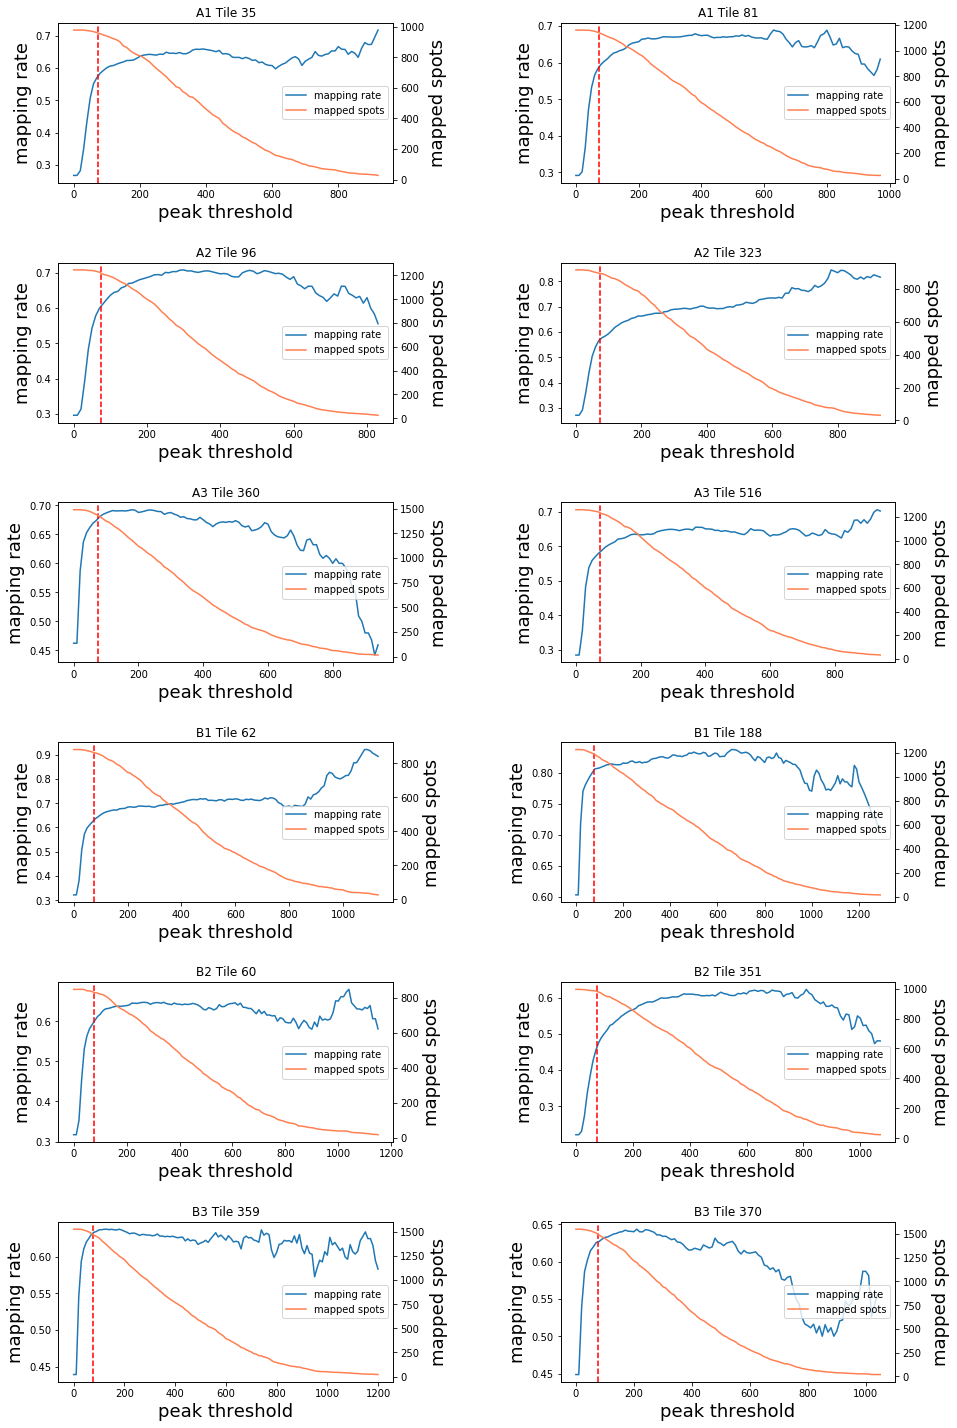

In [ ]:
fig,axes=plt.subplots(6,2,figsize=(15,25),gridspec_kw={'wspace':0.5,'hspace':0.5})

for ax, ((well, tile), df_tile) in zip(axes.reshape(-1),df_reads.groupby(['well','tile'])):
  ops.qc.plot_mapping_vs_threshold(df_tile, barcodes=BARCODES, threshold_var='peak',ax=ax)
  ax.set_title('{well} Tile {tile}'.format(well=well,tile=tile))
  ax.axvline(x=75,color='red',linestyle='--')

## plot mapping vs peak threshold for all sample tiles

Also plotted here with a red dotted line is the THRESHOLD_READS value of 75, chosen for analyzing the entire plate.

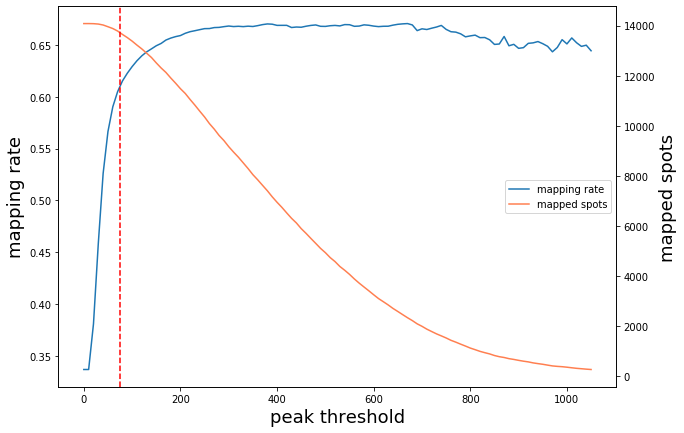

In [ ]:
plt.figure(figsize=(10,7))
df_summary = ops.qc.plot_mapping_vs_threshold(df_reads,barcodes=BARCODES,threshold_var='peak')
plt.axvline(x=75,color='red',linestyle='--')

# Plate QC

The following are standard plots generated for QC after analyzing an experiment. The plate layout heatmap helps to identify plate-, well-, and tile-level effects. The data used here is based on "experimentC" from the IDR dataset, processed using the included "ascp.smk" Snakemake file. After running the Snakemake file, the *.reads.csv and *.cells.csv tables are concatenated into a single table containing data for all wells & tiles. Static versions of these QC plots are included in the "example_data" folder.

In [5]:
import ops.qc

These reads/cells tables are too big for Github, either have to host them elsewhere, or leave it to the user to generate and provide example output plots for comparison.


In [6]:
from google.colab import auth
auth.authenticate_user()

In [7]:
project_id = 'lasagna-199723'
! gcloud config set project {project_id}

Updated property [core/project].


In [8]:
! gsutil -m cp gs://lasagna-east1/idr_experimentC/*.hdf .

Copying gs://lasagna-east1/idr_experimentC/cells.hdf...
Copying gs://lasagna-east1/idr_experimentC/reads.hdf...
/ [2/2 files][  3.0 GiB/  3.0 GiB] 100% Done  48.4 MiB/s ETA 00:00:00           
Operation completed over 2 objects/3.0 GiB.                                      


In [10]:
df_reads = pd.read_hdf('/content/reads.hdf')

In [11]:
df_cells = pd.read_hdf('/content/cells.hdf')

In [9]:
BARCODES = pd.read_csv('/content/NatureProtocols/example_data/barcodes.txt', header=None)[0]

## read count and mapping rate

**Per tile read count:**

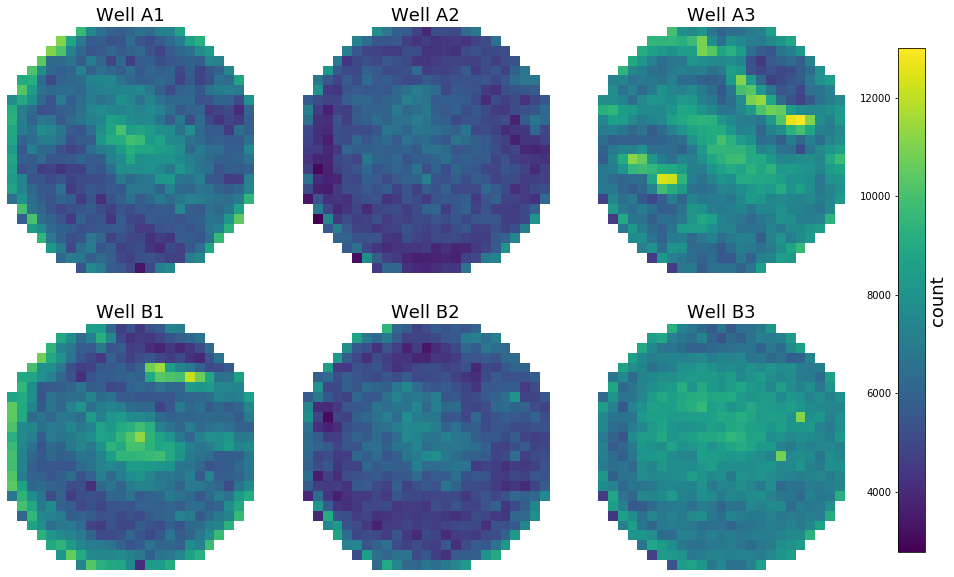

In [41]:
axes = ops.qc.plot_count_heatmap(df_reads, 
                                 shape='square',snake_sites=False)
# plt.savefig('qc_read_count.pdf',dpi=300,bbox_inches='tight')

**Per tile read mapping rate:**

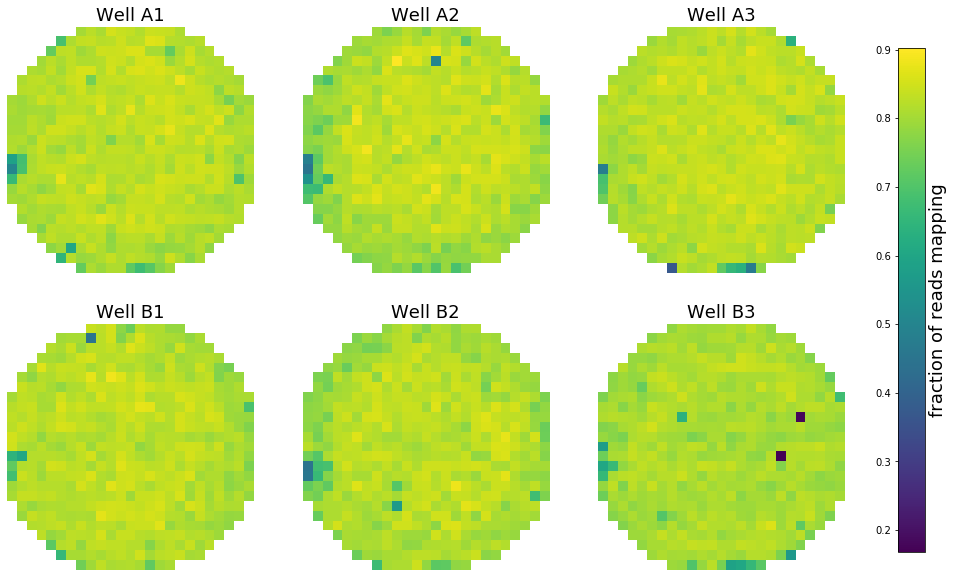

In [42]:
axes = ops.qc.plot_read_mapping_heatmap(df_reads=df_reads,barcodes=BARCODES,
                                        shape='square',snake_sites=False)
# plt.savefig('qc_read_mapping_rate.pdf',dpi=300,bbox_inches='tight')

## cell count and mapping

**Per tile cell count:**

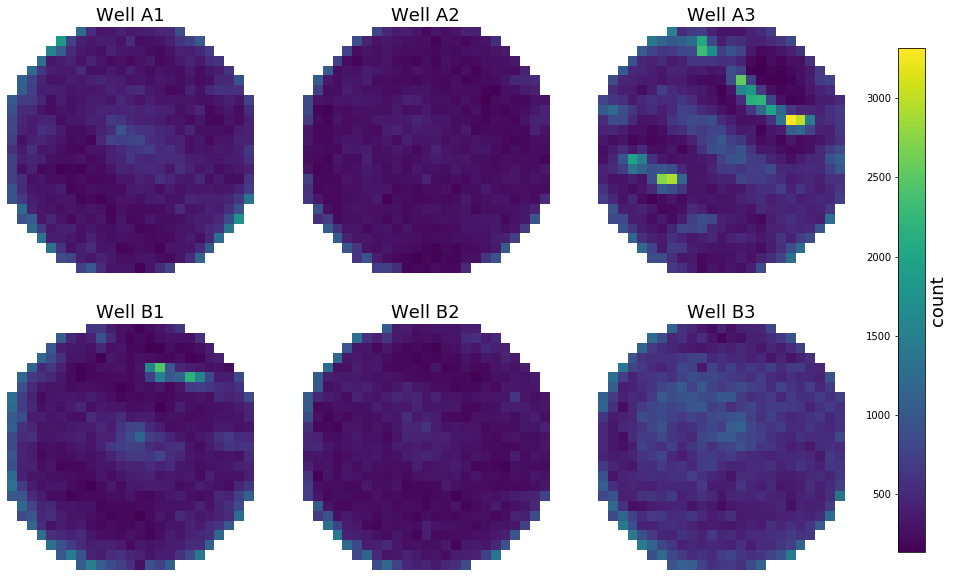

In [43]:
axes = ops.qc.plot_count_heatmap(df_cells,
                                 shape='square',snake_sites=False)
# plt.savefig('qc_cell_count.pdf',dpi=300,bbox_inches='tight')

**Per tile mean barcode count per cell:**

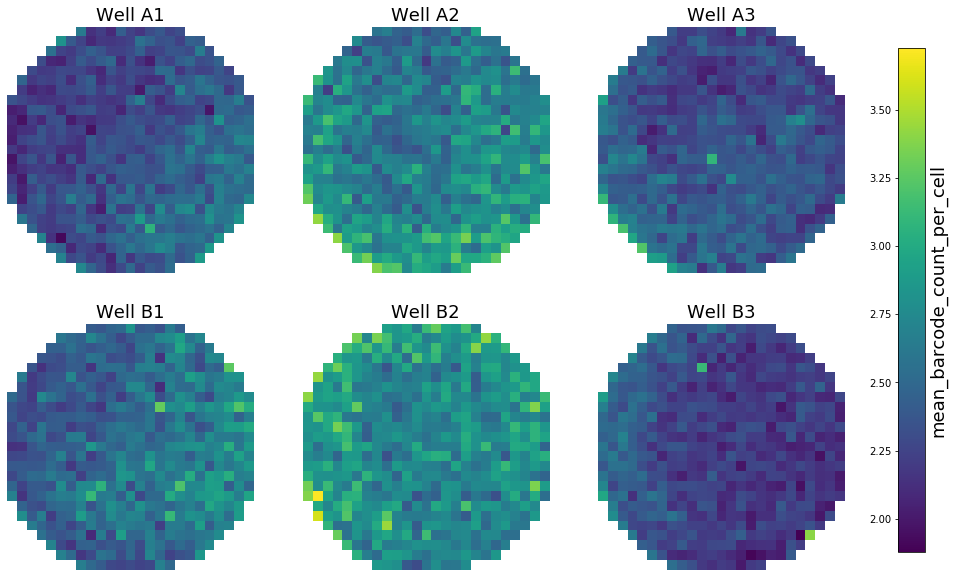

In [44]:
axes = ops.qc.plot_plate_heatmap((df_cells
                                  .groupby(['well','tile'])
                                  ['barcode_count']
                                  .mean()
                                  .rename('mean_barcode_count_per_cell')
                                  .reset_index()
                                  ),
                                 metric='mean_barcode_count_per_cell',
                                 shape='square', snake_sites=False)
# plt.savefig('qc_mean_cell_barcode_count.pdf',dpi=300,bbox_inches='tight')

The caveat here is that df_cells does not include cells without sequencing spots, so these mapping rates are a bit higher than reality. To get the real values, need to use a table of all segmented cells such as by using Snake.extract_phenotype_minimal() with the nuclei segmentation image as both `data_phenotype` and `nuclei`.

The cells table used here did not use expected barcode information to prioritize calling cell barcodes (have to supply Snake.call_cells() with a table of expected barcodes), thus sometimes `cell_barcode_1` maps but `cell_barcode_0` does not. Here we manually set `cell_barcode_1` as `cell_barcode_0` if it is the only barcode that maps to the expected sequences.

In [24]:
# for simulating output of ops.in_situ.call_cells_mapping(), if any read maps, it is cell_barcode_0
def set_mapping_barcode_as_0(cell):
  if cell['sgRNA_0'] == cell['sgRNA_0']:
    # barcode_0 maps
    return cell
  elif cell['sgRNA_1'] == cell['sgRNA_1']:
    # barcode_0 does not map but barcode_1 does
    cell['sgRNA_0'],cell['sgRNA_1'] = cell['sgRNA_1'],cell['sgRNA_0']
    cell['cell_barcode_0'],cell['cell_barcode_1'] = cell['cell_barcode_1'],cell['cell_barcode_0']
    cell['cell_barcode_count_0'],cell['cell_barcode_count_1'] = cell['cell_barcode_count_1'],cell['cell_barcode_count_0']
    return cell
  else:
    return cell

In [25]:
df_cells_mapping = (df_cells
            .merge(BARCODES.rename('sgRNA_0').to_frame(),how='left',left_on='cell_barcode_0',right_on='sgRNA_0')
            .merge(BARCODES.rename('sgRNA_1').to_frame(),how='left',left_on='cell_barcode_1',right_on='sgRNA_1')
            .apply(set_mapping_barcode_as_0,axis=1)
            )

**Per tile rate of cells mapping to at least one barcode:**

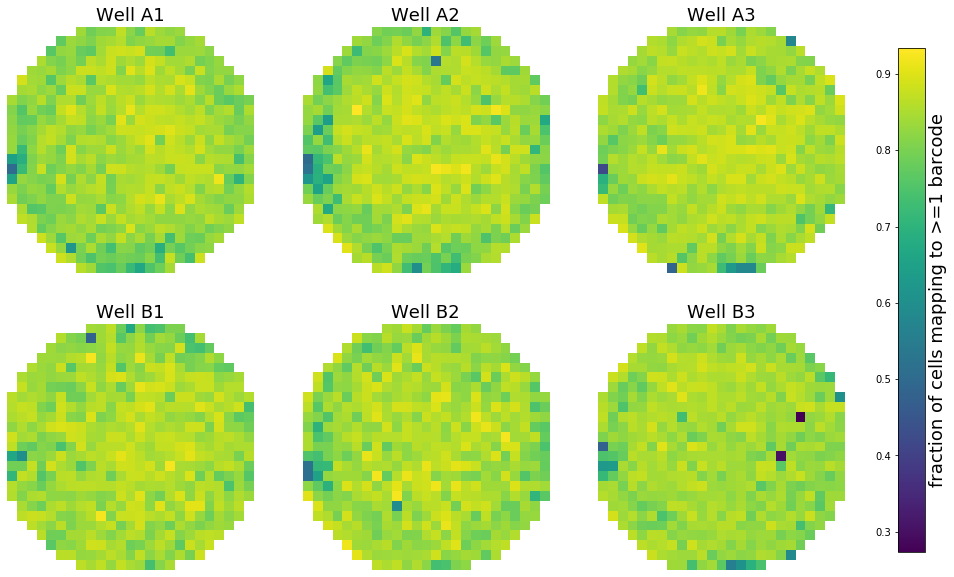

In [45]:
axes = ops.qc.plot_cell_mapping_heatmap(df_cells_mapping,df_cells_mapping,mapping_to='any',
                                        shape='square',snake_sites=False)
# plt.savefig('qc_cell_mapping_rate_any.pdf',dpi=300,bbox_inches='tight')

**Per tile rate of cells mapping to exactly one barcode:**

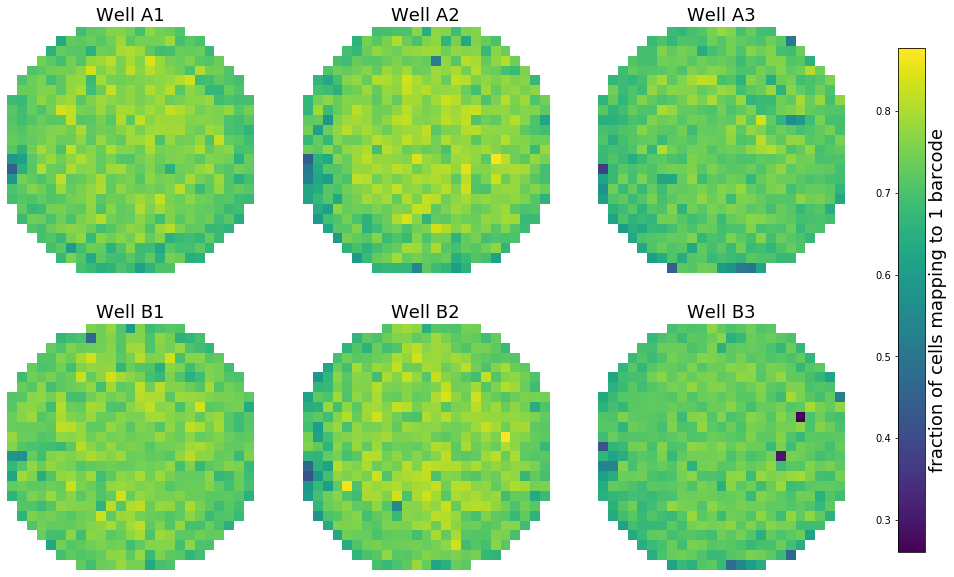

In [46]:
axes = ops.qc.plot_cell_mapping_heatmap(df_cells_mapping,df_cells_mapping,mapping_to='one',
                                        shape='square',snake_sites=False)
# plt.savefig('qc_cell_mapping_rate_one.pdf',dpi=300,bbox_inches='tight')